In [1]:
import pandas as pd

In [2]:
df=pd.read_csv("P3- Churn-Modelling Data.csv")

In [3]:
df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,churned
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'churned'],
      dtype='object')

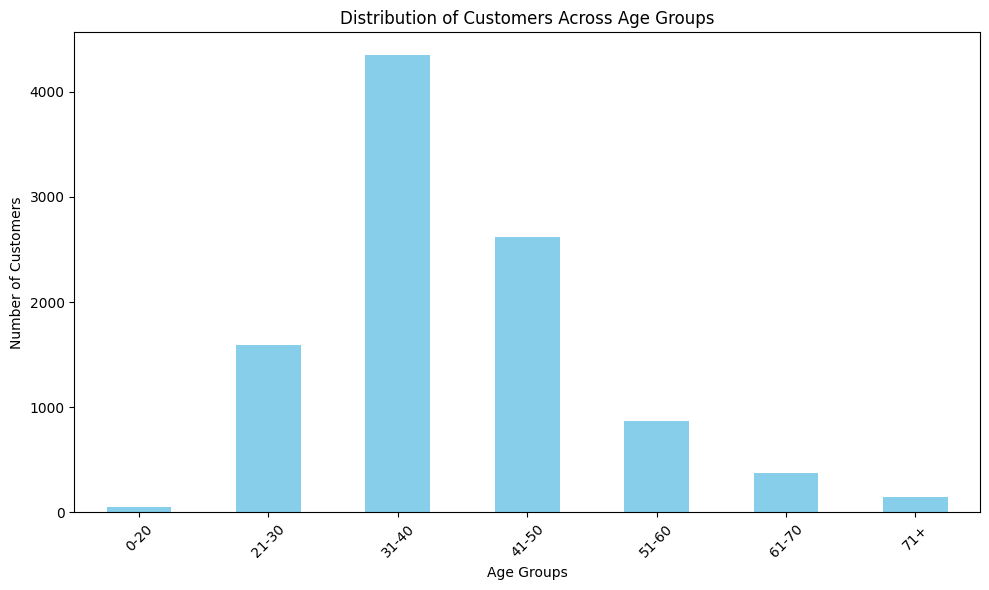

Distribution of customers across different age groups:
AgeGroup
0-20       49
21-30    1592
31-40    4346
41-50    2618
51-60     869
61-70     375
71+       151
Name: count, dtype: int64


In [5]:
import pandas as pd
import matplotlib.pyplot as plt



# Define age groups
bins = [0, 20, 30, 40, 50, 60, 70, float('inf')]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71+']

# Group customers by age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


age_group_counts = df['AgeGroup'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
age_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Age Groups')
plt.xlabel('Age Groups')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


print("Distribution of customers across different age groups:")
print(age_group_counts)


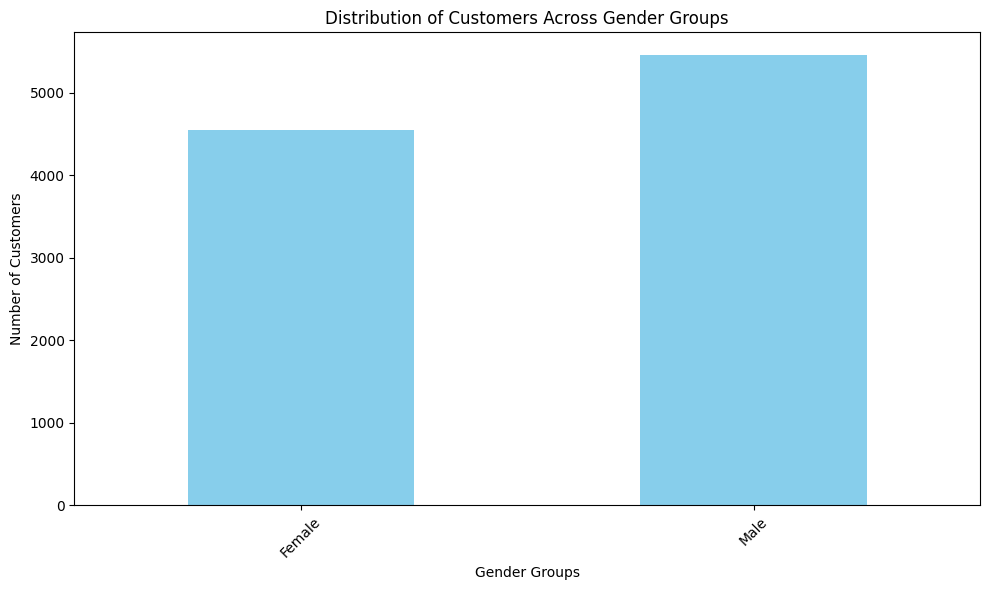

Distribution of customers across different Gender groups:
Gender
Female    4543
Male      5457
Name: count, dtype: int64


In [6]:
gender_group_counts = df['Gender'].value_counts().sort_index()

# Plotting the distribution
plt.figure(figsize=(10, 6))
gender_group_counts.plot(kind='bar', color='skyblue')
plt.title('Distribution of Customers Across Gender Groups')
plt.xlabel('Gender Groups')
plt.ylabel('Number of Customers')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Optionally, you can also display the counts directly
print("Distribution of customers across different Gender groups:")
print(gender_group_counts)

In [7]:

num_churned = df['churned'].sum()


total_customers = len(df)


percentage_churned = (num_churned / total_customers) * 100

print(f"Percentage of customers who have churned: {percentage_churned:.2f}%")

Percentage of customers who have churned: 20.37%


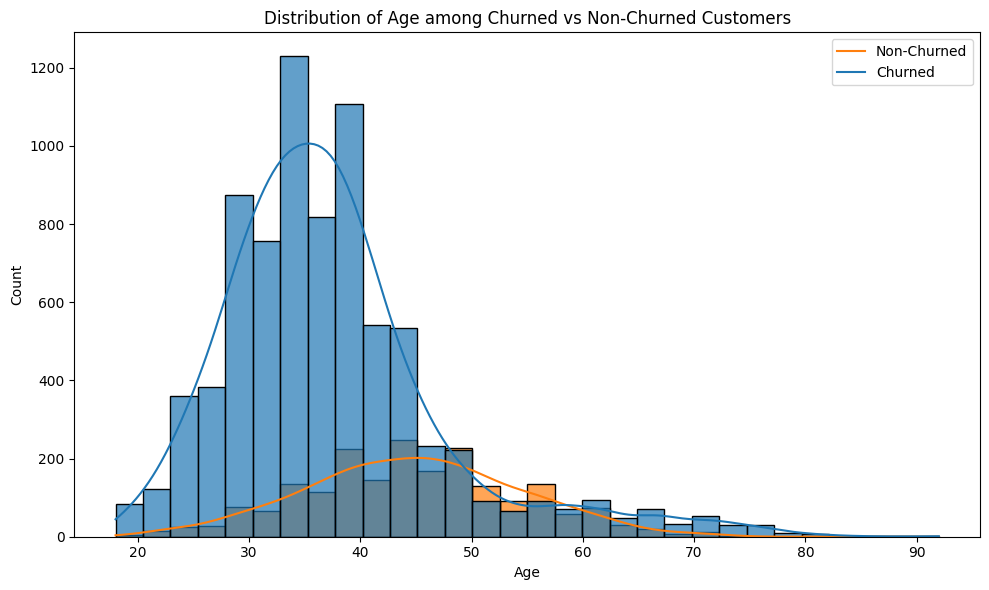

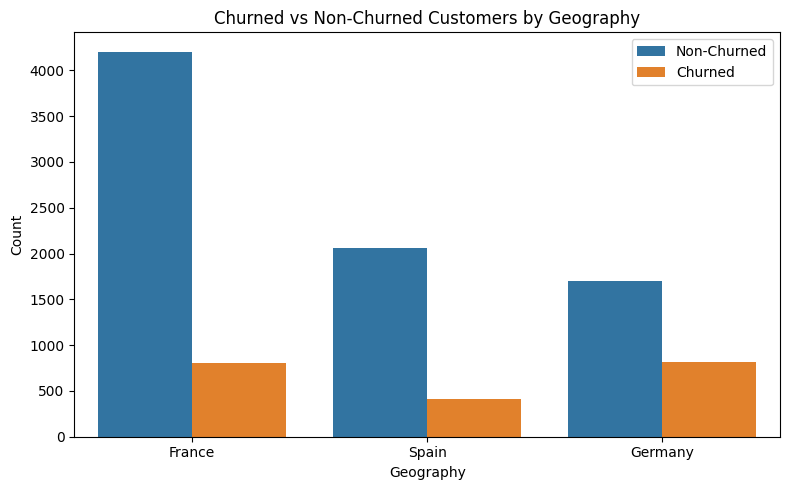

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


churned_summary = df[df['churned'] == 1].describe(include='all')


non_churned_summary = df[df['churned'] == 0].describe(include='all')


plt.figure(figsize=(10, 6))
sns.histplot(data=df, x='Age', hue='churned', bins=30, kde=True, alpha=0.7)
plt.title('Distribution of Age among Churned vs Non-Churned Customers')
plt.xlabel('Age')
plt.ylabel('Count')
plt.legend(['Non-Churned', 'Churned'])
plt.tight_layout()
plt.show()

plt.figure(figsize=(8, 5))
sns.countplot(data=df, x='Geography', hue='churned')
plt.title('Churned vs Non-Churned Customers by Geography')
plt.xlabel('Geography')
plt.ylabel('Count')
plt.legend(['Non-Churned', 'Churned'])
plt.tight_layout()
plt.show()

#

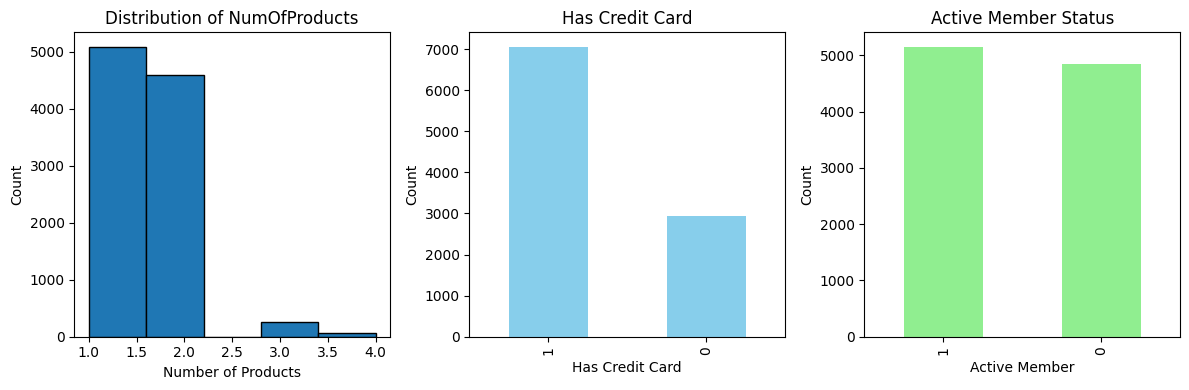

Summary statistics for NumOfProducts:
count    10000.000000
mean         1.530200
std          0.581654
min          1.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          4.000000
Name: NumOfProducts, dtype: float64

Counts for HasCrCard:
HasCrCard
1    7055
0    2945
Name: count, dtype: int64

Counts for IsActiveMember:
IsActiveMember
1    5151
0    4849
Name: count, dtype: int64


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt




# Calculate summary statistics
num_products_stats = df['NumOfProducts'].describe()
has_credit_card_counts = df['HasCrCard'].value_counts()
active_member_counts = df['IsActiveMember'].value_counts()

# Plotting
plt.figure(figsize=(12, 4))

# Plot for NumOfProducts
plt.subplot(1, 3, 1)
plt.hist(df['NumOfProducts'], bins=5, edgecolor='black')
plt.title('Distribution of NumOfProducts')
plt.xlabel('Number of Products')
plt.ylabel('Count')

# Plot for HasCrCard
plt.subplot(1, 3, 2)
has_credit_card_counts.plot(kind='bar', color='skyblue')
plt.title('Has Credit Card')
plt.xlabel('Has Credit Card')
plt.ylabel('Count')

# Plot for IsActiveMember
plt.subplot(1, 3, 3)
active_member_counts.plot(kind='bar', color='lightgreen')
plt.title('Active Member Status')
plt.xlabel('Active Member')
plt.ylabel('Count')

plt.tight_layout()
plt.show()

# Display summary statistics
print("Summary statistics for NumOfProducts:")
print(num_products_stats)
print("\nCounts for HasCrCard:")
print(has_credit_card_counts)
print("\nCounts for IsActiveMember:")
print(active_member_counts)



C:\Users\ASUS\AppData\Local\Temp\ipykernel_18144\2465525849.py:14: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  age_group_usage = df.groupby('AgeGroup').agg({


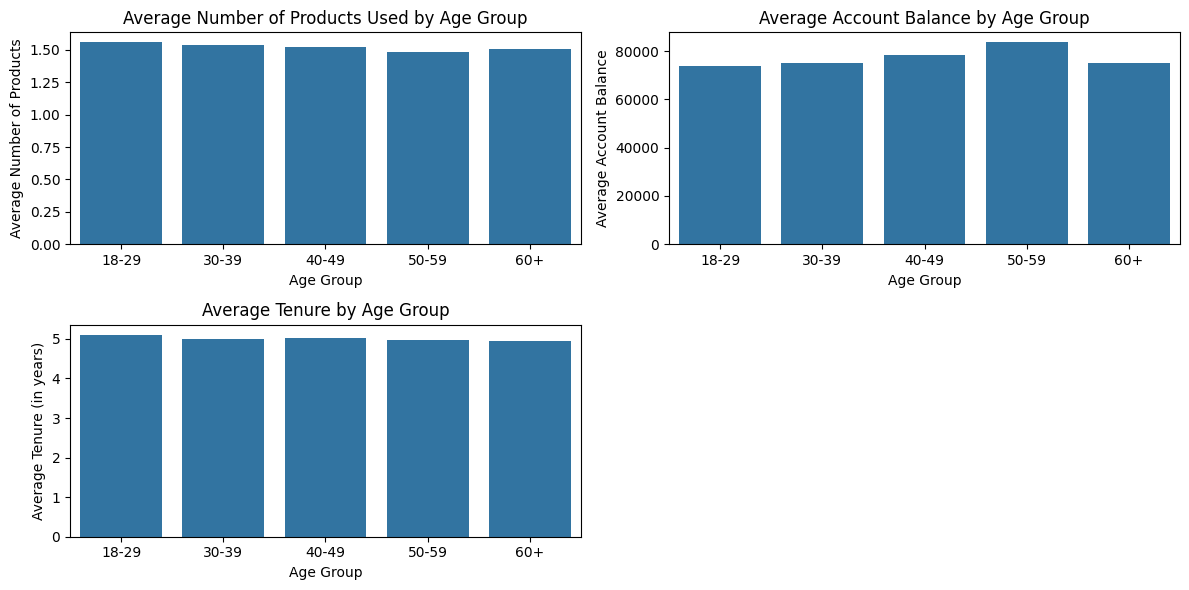

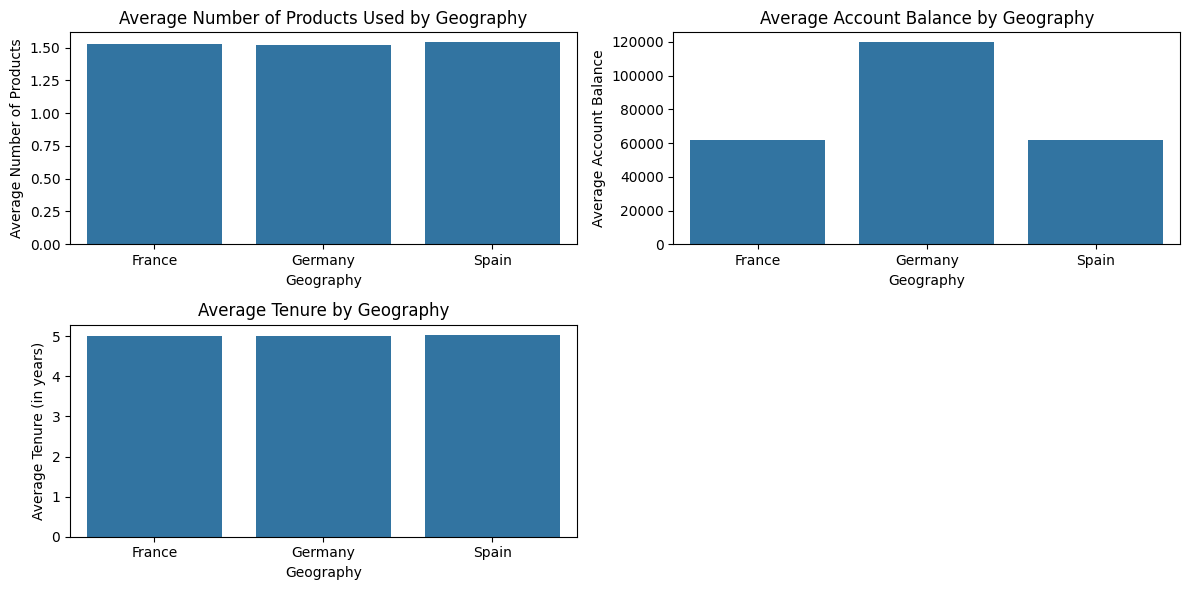

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns




bins = [18, 30, 40, 50, 60, 100]  # Define age bins
labels = ['18-29', '30-39', '40-49', '50-59', '60+']  # Labels for age groups
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

# Analyze usage patterns by age group
age_group_usage = df.groupby('AgeGroup').agg({
    'NumOfProducts': 'mean',
    'Balance': 'mean',
    'Tenure': 'mean'
}).reset_index()

# Plotting usage patterns by age group
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='AgeGroup', y='NumOfProducts', data=age_group_usage)
plt.title('Average Number of Products Used by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Number of Products')

plt.subplot(2, 2, 2)
sns.barplot(x='AgeGroup', y='Balance', data=age_group_usage)
plt.title('Average Account Balance by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Account Balance')

plt.subplot(2, 2, 3)
sns.barplot(x='AgeGroup', y='Tenure', data=age_group_usage)
plt.title('Average Tenure by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Tenure (in years)')

plt.tight_layout()
plt.show()

# Segment customers based on geography
geo_usage = df.groupby('Geography').agg({
    'NumOfProducts': 'mean',
    'Balance': 'mean',
    'Tenure': 'mean'
}).reset_index()

# Plotting usage patterns by geography
plt.figure(figsize=(12, 6))
plt.subplot(2, 2, 1)
sns.barplot(x='Geography', y='NumOfProducts', data=geo_usage)
plt.title('Average Number of Products Used by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Number of Products')

plt.subplot(2, 2, 2)
sns.barplot(x='Geography', y='Balance', data=geo_usage)
plt.title('Average Account Balance by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Account Balance')

plt.subplot(2, 2, 3)
sns.barplot(x='Geography', y='Tenure', data=geo_usage)
plt.title('Average Tenure by Geography')
plt.xlabel('Geography')
plt.ylabel('Average Tenure (in years)')

plt.tight_layout()
plt.show()


In [ ]:
df['Balance'].mean()

np.float64(76485.889288)

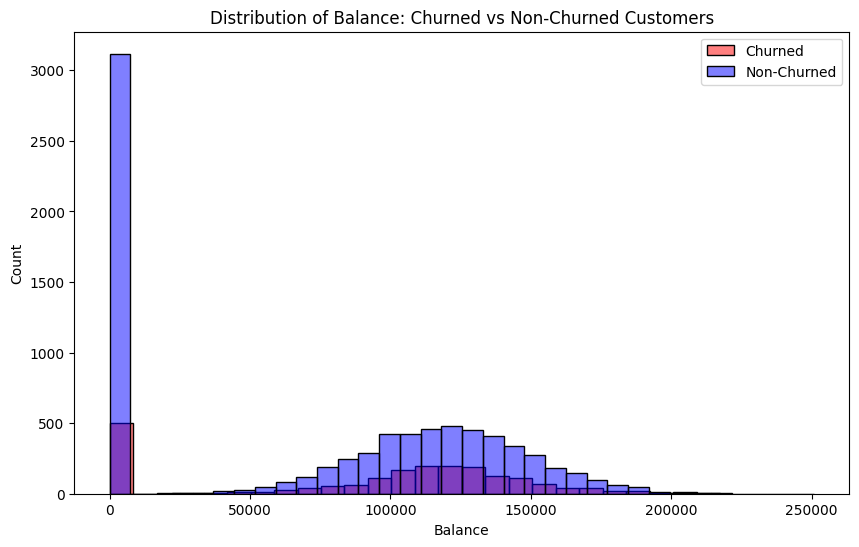

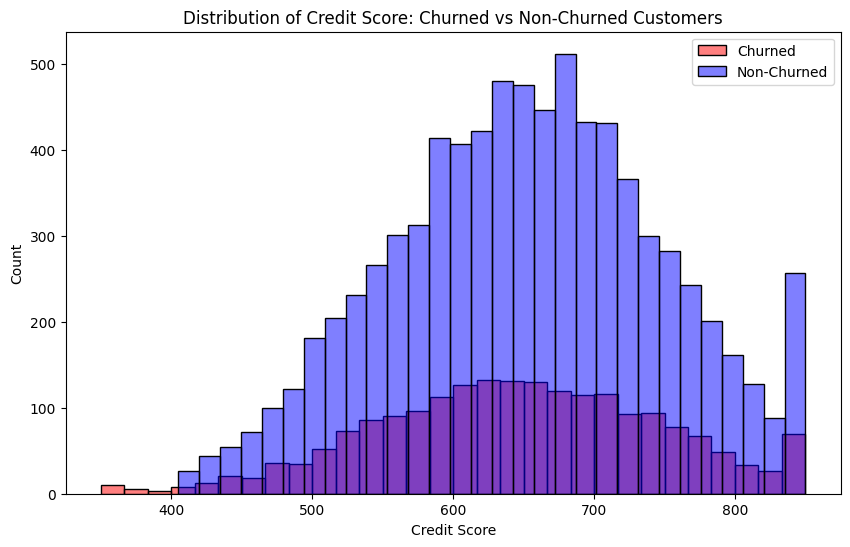

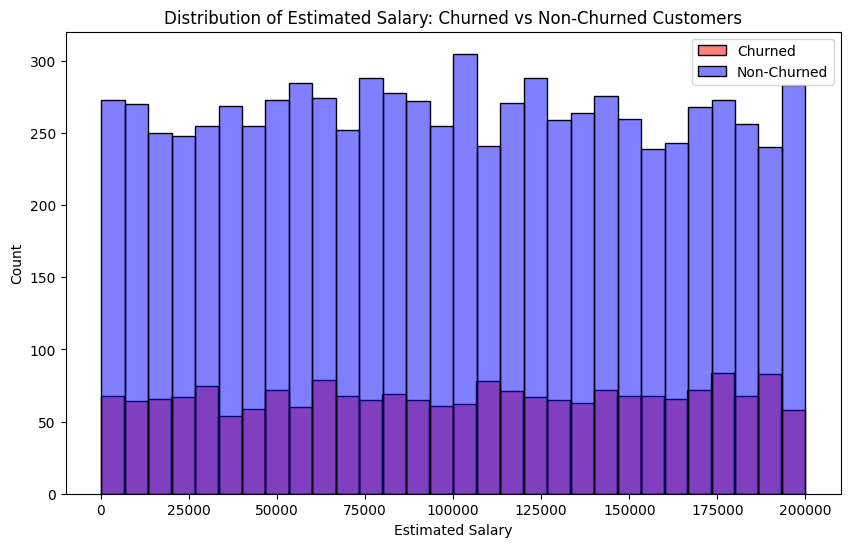

T-test results for Balance: t-statistic = 11.936240300013841, p-value = 1.2755633191525477e-32


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



churned_customers = df[df['churned'] == 1]
non_churned_customers = df[df['churned'] == 0]


plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['Balance'], bins=30, color='red', alpha=0.5, label='Churned')
sns.histplot(non_churned_customers['Balance'], bins=30, color='blue', alpha=0.5, label='Non-Churned')
plt.title('Distribution of Balance: Churned vs Non-Churned Customers')
plt.xlabel('Balance')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['CreditScore'], bins=30, color='red', alpha=0.5, label='Churned')
sns.histplot(non_churned_customers['CreditScore'], bins=30, color='blue', alpha=0.5, label='Non-Churned')
plt.title('Distribution of Credit Score: Churned vs Non-Churned Customers')
plt.xlabel('Credit Score')
plt.legend()
plt.show()


plt.figure(figsize=(10, 6))
sns.histplot(churned_customers['EstimatedSalary'], bins=30, color='red', alpha=0.5, label='Churned')
sns.histplot(non_churned_customers['EstimatedSalary'], bins=30, color='blue', alpha=0.5, label='Non-Churned')
plt.title('Distribution of Estimated Salary: Churned vs Non-Churned Customers')
plt.xlabel('Estimated Salary')
plt.legend()
plt.show()


from scipy.stats import ttest_ind

# Example of t-test for 'Balance'
balance_churned = churned_customers['Balance']
balance_non_churned = non_churned_customers['Balance']
t_stat, p_value = ttest_ind(balance_churned, balance_non_churned)
print(f'T-test results for Balance: t-statistic = {t_stat}, p-value = {p_value}')


In [10]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.preprocessing import StandardScaler

e
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'HasCrCard', 'IsActiveMember', 'EstimatedSalary']
target = 'churned'

X = df[features]
y = df[target]



X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


logreg = LogisticRegression(random_state=42)
logreg.fit(X_train_scaled, y_train)


y_pred = logreg.predict(X_test_scaled)
y_pred_proba = logreg.predict_proba(X_test_scaled)[:, 1]  # Probability of churn

print("Classification Report:")
print(classification_report(y_test, y_pred))


auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {auc_score:.4f}")


feature_importance = pd.DataFrame({'Feature': features, 'Importance': logreg.coef_[0]})
feature_importance = feature_importance.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importance)


Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1607
           1       0.54      0.15      0.23       393

    accuracy                           0.81      2000
   macro avg       0.68      0.56      0.56      2000
weighted avg       0.77      0.81      0.76      2000


ROC AUC Score: 0.7566

Feature Importance:
           Feature  Importance
1              Age    0.755802
2          Balance    0.300973
6  EstimatedSalary    0.022070
4        HasCrCard   -0.004163
3    NumOfProducts   -0.017437
0      CreditScore   -0.062560
5   IsActiveMember   -0.536130


In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix



features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']
target = 'churned'


X = df[features]
y = df[target]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


rf_classifier = RandomForestClassifier(random_state=42)


param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)


best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)


y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))


auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {auc_score:.4f}")


print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000


ROC AUC Score: 0.8478

Confusion Matrix:
[[1552   55]
 [ 232  161]]

Feature Importance:
           Feature  Importance
1              Age    0.376864
3    NumOfProducts    0.278613
2          Balance    0.099520
5  EstimatedSalary    0.084168
4   IsActiveMember    0.081072
0      CreditScore    0.079762


In [12]:
from sklearn.metrics import accuracy_score
accuracy_score(y_pred, y_test)

0.8565

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix


# Select relevant features and target variable
features = ['CreditScore', 'Age', 'Balance', 'NumOfProducts', 'IsActiveMember', 'EstimatedSalary']
target = 'churned'

# Create X (features) and y (target)
X = df[features]
y = df[target]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)

# Optionally, perform hyperparameter tuning using GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}
grid_search = GridSearchCV(rf_classifier, param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train, y_train)

# Fit the model with best parameters from GridSearchCV
best_rf = grid_search.best_estimator_
best_rf.fit(X_train, y_train)

# Predict churn on the test set
y_pred = best_rf.predict(X_test)
y_pred_proba = best_rf.predict_proba(X_test)[:, 1]  # Probability of churn

# Evaluate model performance
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Calculate ROC AUC score
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"\nROC AUC Score: {auc_score:.4f}")

# Confusion matrix
print("\nConfusion Matrix:")
print(confusion_matrix(y_test, y_pred))

# Feature importance
feature_importances = pd.DataFrame({'Feature': features, 'Importance': best_rf.feature_importances_})
feature_importances = feature_importances.sort_values(by='Importance', ascending=False)

print("\nFeature Importance:")
print(feature_importances)

# Identify top features contributing to the output
top_features = feature_importances.sort_values(by='Importance', ascending=False)
print("\nTop Features Contributing to the Output:")
print(top_features)


Classification Report:
              precision    recall  f1-score   support

           0       0.87      0.97      0.92      1607
           1       0.75      0.41      0.53       393

    accuracy                           0.86      2000
   macro avg       0.81      0.69      0.72      2000
weighted avg       0.85      0.86      0.84      2000


ROC AUC Score: 0.8478

Confusion Matrix:
[[1552   55]
 [ 232  161]]

Feature Importance:
           Feature  Importance
1              Age    0.376864
3    NumOfProducts    0.278613
2          Balance    0.099520
5  EstimatedSalary    0.084168
4   IsActiveMember    0.081072
0      CreditScore    0.079762

Top Features Contributing to the Output:
           Feature  Importance
1              Age    0.376864
3    NumOfProducts    0.278613
2          Balance    0.099520
5  EstimatedSalary    0.084168
4   IsActiveMember    0.081072
0      CreditScore    0.079762
